# <font color="red"> Breast Cancer Alive/Dead

Background
This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:

* **Patient_ID:** unique identifier id of a patient

* **Age:** age at diagnosis (Years)

* **Gender:** Male/Female

* **Protein1, Protein2, Protein3, Protein4:** expression levels (undefined units)

* **Tumour_Stage:** I, II, III

* **Histology:** Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma

* **ER status:** Positive/Negative, ER-positive: Breast cancers that have estrogen receptors are called ER-positive (or ER+) cancers.

* **PR status:** Positive/Negative, PR-positive: Breast cancers with progesterone receptors are called PR-positive (or PR+) cancers.

* **HER2 status:** Positive/Negative,It is a growth-promoting protein found outside of all breast formations. Breast cell cells with higher-than-normal levels of HER2 are called HER2-positive.

* **Surgery_type:** Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other

* **Date_of_Surgery:** Date on which surgery was performed (in DD-MON-YY)

* **Date_of_Last_Visit:** Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visited again after the surgery]

* **Patient_Status:** Alive/Dead [can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead].

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


#for classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import f1_score
import xgboost as xgb

In [2]:
df=pd.read_csv("BRCA.csv")

In [3]:
len(df)

341

In [4]:
df.head(7)

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638  0.547150  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807  0.614470 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140 -0.327470 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147 -0.193040  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680  0.520450 -0.311990   
5  TCGA-AO-A1KQ  84.0    MALE -0.081872   1.72410 -0.057335  0.043025   
6  TCGA-D8-A73X  53.0  FEMALE -0.069535   1.41830 -0.361050  0.391580   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
5          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
6           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified Radical Mastectomy       15-Jan-17          19-Jun-17   
1                   Lumpectomy       26-Apr-17          09-Nov-18   
2                        Other       08-Sep-17          09-Jun-18   
3  Modified Radical Mastectomy       25-Jan-17          12-Jul-17   
4                        Other       06-May-17          27-Jun-19   
5  Modified Radical Mastectomy       18-Sep-17          15-Nov-21   
6            Simple Mastectomy       04-Feb-17          07-Feb-18   

  Patient_Status  
0          Alive  
1           Dead  
2          Alive  
3          Alive  
4           Dead  
5          Alive  
6          Alive

In [5]:
df.tail(10)

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
331  TCGA-A1-A0SG  61.0  FEMALE  -0.71947   2.54850  -0.15024  0.339680   
332  TCGA-A2-A0EU  79.0  FEMALE   0.47940   2.05590  -0.53136 -0.188480   
333  TCGA-B6-A40B  76.0  FEMALE  -0.24427   0.92556  -0.41823 -0.067848   
334           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
335           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
336           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
337           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
338           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
339           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
340           NaN   NaN     NaN       NaN       NaN       NaN       NaN   

    Tumour_Stage                      Histology ER status PR status  \
331           II  Infiltrating Ductal Carcinoma  Positive  Positive   
332            I  Infiltrating Ductal Carcinoma  Positive  Positive   
333            I  Infiltrating Ductal Carcinoma  Positive  Positive   
334          NaN                            NaN       NaN       NaN   
335          NaN                            NaN       NaN       NaN   
336          NaN                            NaN       NaN       NaN   
337          NaN                            NaN       NaN       NaN   
338          NaN                            NaN       NaN       NaN   
339          NaN                            NaN       NaN       NaN   
340          NaN                            NaN       NaN       NaN   

    HER2 status Surgery_type Date_of_Surgery Date_of_Last_Visit Patient_Status  
331    Negative   Lumpectomy       11-Nov-19          18-Jan-21           Dead  
332    Positive   Lumpectomy       21-Nov-19          19-Feb-21           Dead  
333    Negative   Lumpectomy       11-Nov-19          05-Jan-21           Dead  
334         NaN          NaN             NaN                NaN            NaN  
335         NaN          NaN             NaN                NaN            NaN  
336         NaN          NaN             NaN                NaN            NaN  
337         NaN          NaN             NaN                NaN            NaN  
338         NaN          NaN             NaN                NaN            NaN  
339         NaN          NaN             NaN                NaN            NaN  
340         NaN          NaN             NaN                NaN            NaN

In [6]:
df=df.drop(df.tail(7).index)

In [7]:
df.tail(10)

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
324  TCGA-AR-A2LQ  59.0  FEMALE  0.150500   1.26740   0.64265  0.261420   
325  TCGA-BH-A0BV  78.0  FEMALE -0.917230  -0.64693   0.55259  0.458740   
326  TCGA-AO-A1KO  46.0  FEMALE -0.740140  -0.73755   0.72032  0.721820   
327  TCGA-E2-A1B5  46.0  FEMALE -0.055036  -0.50643   0.88778 -0.089424   
328  TCGA-AR-A1AL  60.0  FEMALE  0.094585   1.00030  -0.22575  0.048602   
329  TCGA-AN-A04A  36.0  FEMALE  0.231800   0.61804  -0.55779 -0.517350   
330  TCGA-A8-A085  44.0    MALE  0.732720   1.11170  -0.26952 -0.354920   
331  TCGA-A1-A0SG  61.0  FEMALE -0.719470   2.54850  -0.15024  0.339680   
332  TCGA-A2-A0EU  79.0  FEMALE  0.479400   2.05590  -0.53136 -0.188480   
333  TCGA-B6-A40B  76.0  FEMALE -0.244270   0.92556  -0.41823 -0.067848   

    Tumour_Stage                       Histology ER status PR status  \
324           II   Infiltrating Ductal Carcinoma  Positive  Positive   
325           II  Infiltrating Lobular Carcinoma  Positive  Positive   
326           II   Infiltrating Ductal Carcinoma  Positive  Positive   
327           II   Infiltrating Ductal Carcinoma  Positive  Positive   
328          III   Infiltrating Ductal Carcinoma  Positive  Positive   
329          III   Infiltrating Ductal Carcinoma  Positive  Positive   
330           II  Infiltrating Lobular Carcinoma  Positive  Positive   
331           II   Infiltrating Ductal Carcinoma  Positive  Positive   
332            I   Infiltrating Ductal Carcinoma  Positive  Positive   
333            I   Infiltrating Ductal Carcinoma  Positive  Positive   

    HER2 status                 Surgery_type Date_of_Surgery  \
324    Negative            Simple Mastectomy       12-Oct-19   
325    Negative  Modified Radical Mastectomy       22-Oct-19   
326    Negative            Simple Mastectomy       01-Nov-19   
327    Negative                   Lumpectomy       22-Oct-19   
328    Negative            Simple Mastectomy       01-Nov-19   
329    Positive            Simple Mastectomy       11-Nov-19   
330    Negative                        Other       01-Nov-19   
331    Negative                   Lumpectomy       11-Nov-19   
332    Positive                   Lumpectomy       21-Nov-19   
333    Negative                   Lumpectomy       11-Nov-19   

    Date_of_Last_Visit Patient_Status  
324          01-Feb-21          Alive  
325          24-Mar-21          Alive  
326          22-Jan-21          Alive  
327          09-Feb-21           Dead  
328          28-Feb-21           Dead  
329          09-Feb-20           Dead  
330          04-Mar-20           Dead  
331          18-Jan-21           Dead  
332          19-Feb-21           Dead  
333          05-Jan-21           Dead

In [8]:
df.describe()

Age    Protein1    Protein2    Protein3    Protein4
count  334.000000  334.000000  334.000000  334.000000  334.000000
mean    58.886228   -0.029991    0.946896   -0.090204    0.009819
std     12.961212    0.563588    0.911637    0.585175    0.629055
min     29.000000   -2.340900   -0.978730   -1.627400   -2.025500
25%     49.000000   -0.358888    0.362173   -0.513748   -0.377090
50%     58.000000    0.006129    0.992805   -0.173180    0.041768
75%     68.000000    0.343598    1.627900    0.278353    0.425630
max     90.000000    1.593600    3.402200    2.193400    1.629900

In [9]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

##<font color="purple"> EDA-Exploratory Data Analysis

Text(0.5, 0, 'Age')

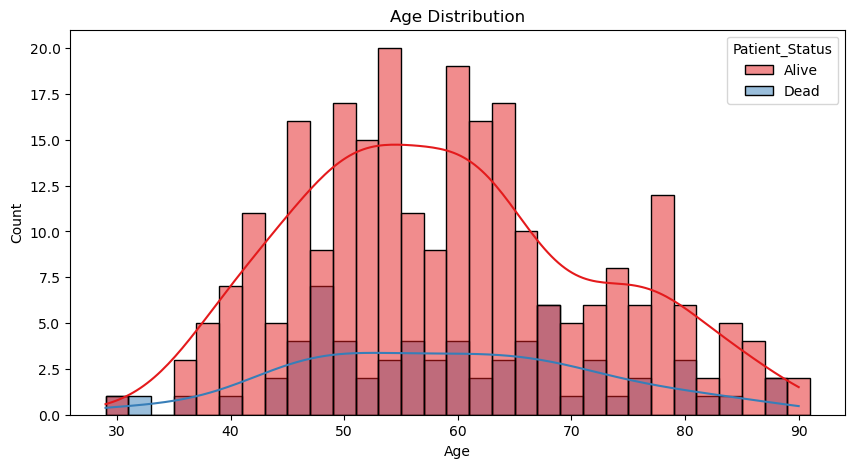

In [11]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="Age",hue="Patient_Status", binwidth=2, kde=True,palette="Set1")

plt.title("Age Distribution")
plt.xlabel("Age")

Text(0.5, 0, 'Gender')

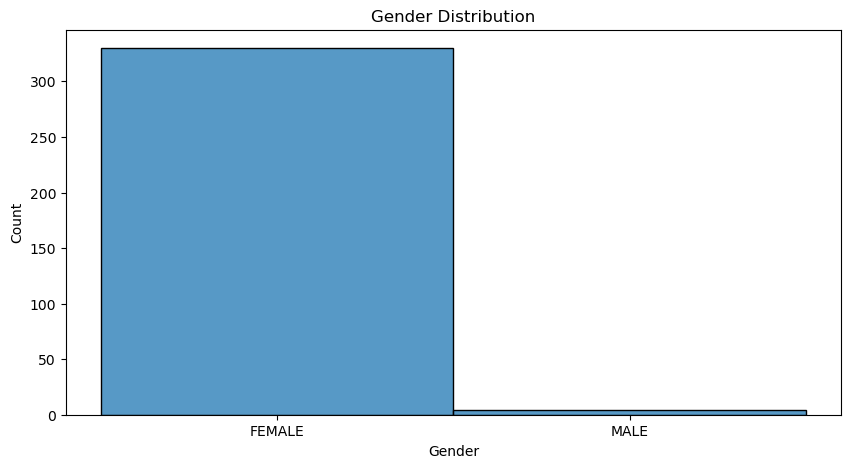

In [12]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="Gender",palette="Set1")

plt.title("Gender Distribution")
plt.xlabel("Gender")

In [13]:
#df["Gender"]=df["Gender"].replace({"FEMALE":1,"MALE":0})

In [14]:
#df["Gender"]

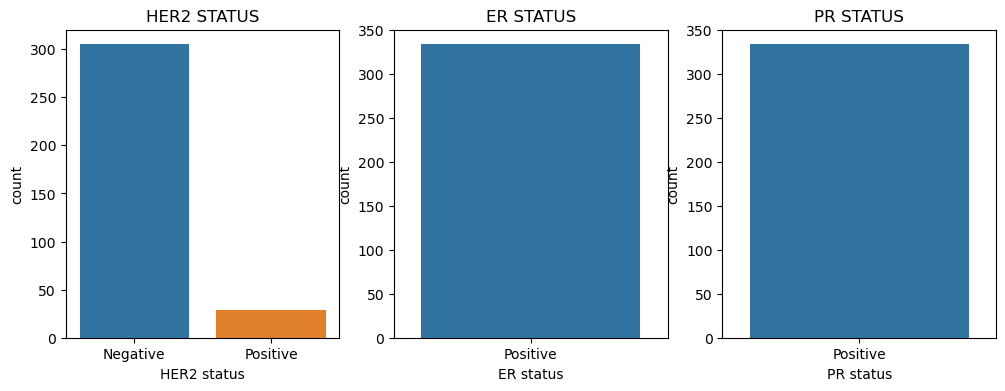

In [22]:
fig, axs=plt.subplots(ncols=3,figsize=(12,4))

sns.countplot(x = df["HER2 status"],ax=axs[0])
axs[0].set_title("HER2 STATUS")

sns.countplot(x = df["ER status"],ax=axs[1])
axs[1].set_title("ER STATUS")

sns.countplot(x = df["PR status"],ax=axs[2])
axs[2].set_title("PR STATUS")

plt.show()

In [28]:
surgery_counts = df["Surgery_type"].value_counts()

surgery_types=surgery_counts.index

surgery_quantities = surgery_counts.values

In [25]:
surgery_counts

Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: Surgery_type, dtype: int64

In [27]:
surgery_types

Index(['Other', 'Modified Radical Mastectomy', 'Simple Mastectomy',
       'Lumpectomy'],
      dtype='object')

In [29]:
surgery_quantities

array([105,  96,  67,  66], dtype=int64)

In [30]:
fig = px.pie(data_frame=df,
            values=surgery_quantities,
            names=surgery_types,
            hole=0.5,
            title="Type of Surgery of Patients")

fig.show()

In [31]:
histology = df["Histology"].value_counts()
histology_types = histology.index
hist_quantity = histology.values

In [32]:
histology

Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

In [33]:
histology_types

Index(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'],
      dtype='object')

In [34]:
hist_quantity

array([233,  89,  12], dtype=int64)

In [36]:
fig = px.pie(df,
            values=hist_quantity,
            names=histology_types,
            hole=0.5,
            title="Type of Surgery of Patients")

fig.show()

In [37]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

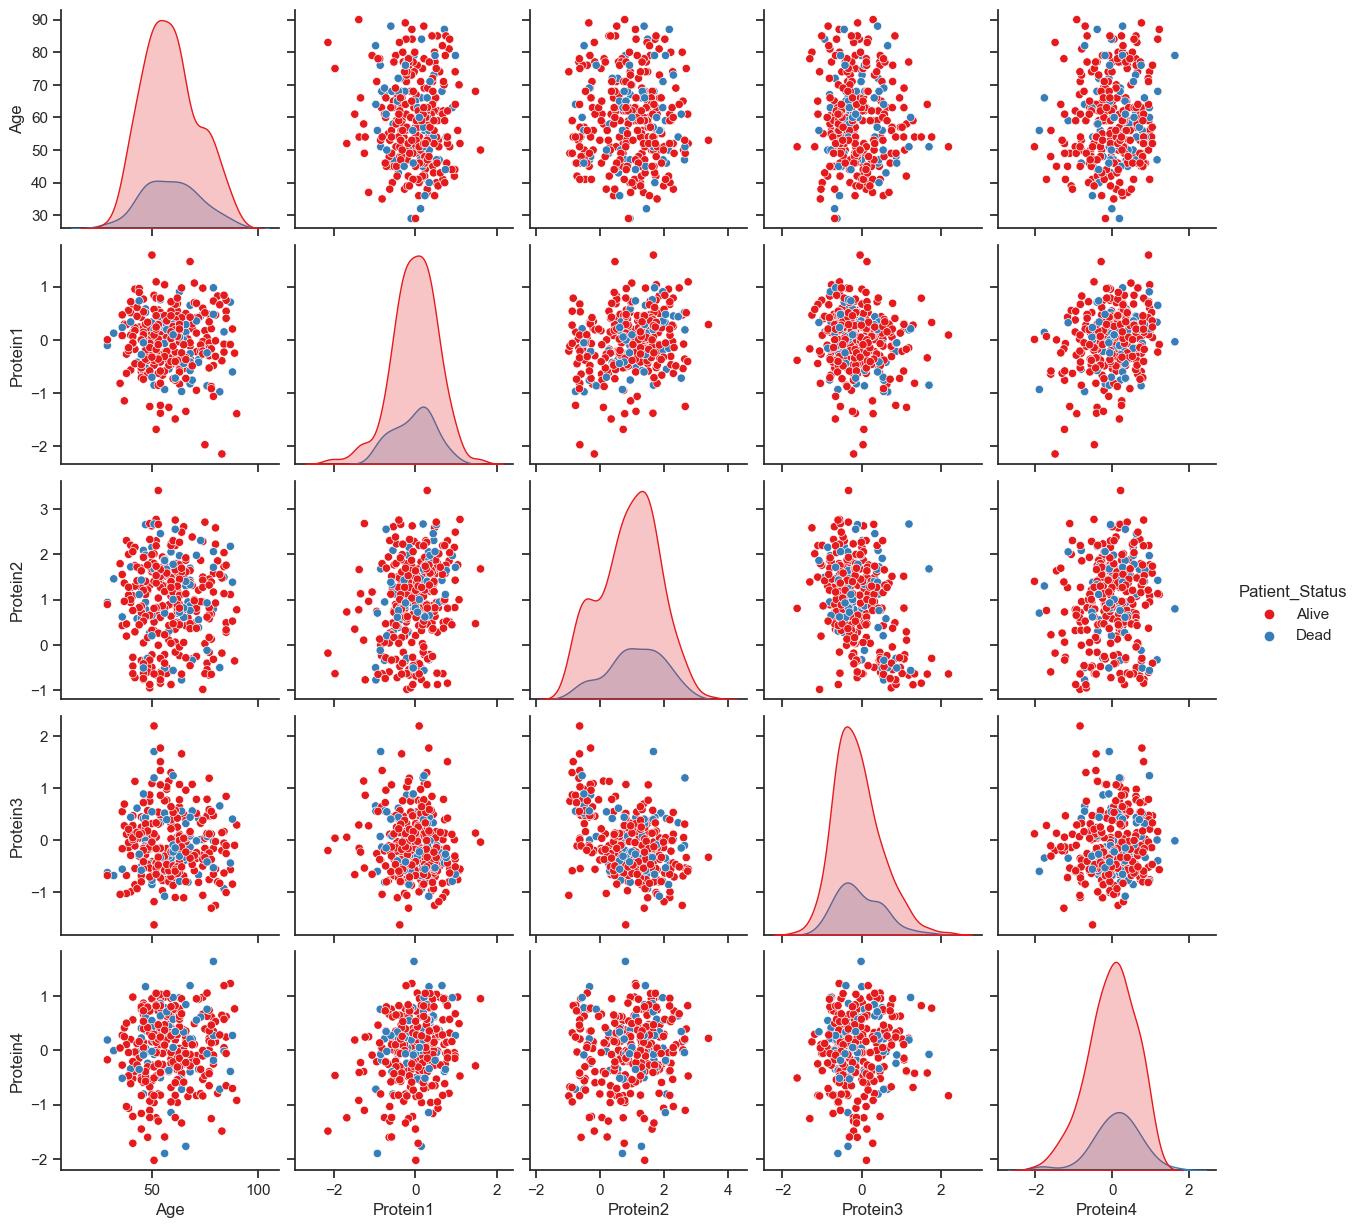

In [49]:
sns.set(style="ticks")
sns.pairplot(df,hue="Patient_Status",palette="Set1")

plt.show()

Text(0.5, 0, 'Histology')

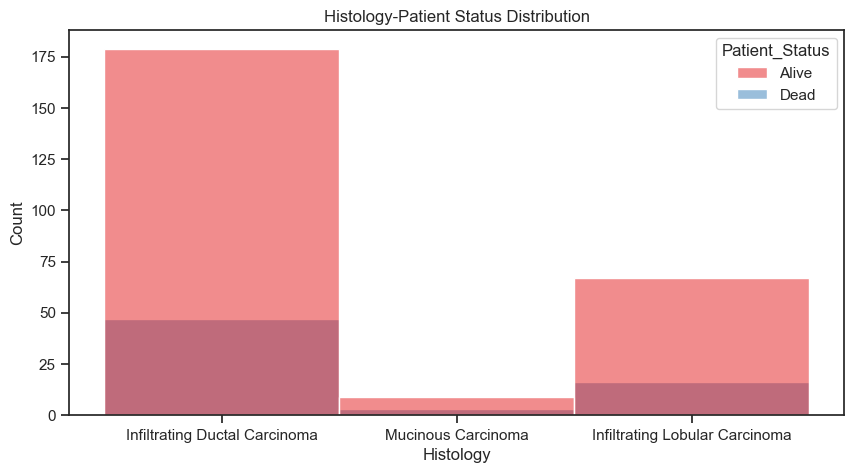

In [60]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="Histology",hue="Patient_Status",palette="Set1")

plt.title("Histology-Patient Status Distribution")
plt.xlabel("Histology")

Text(0.5, 0, 'Surgery type')

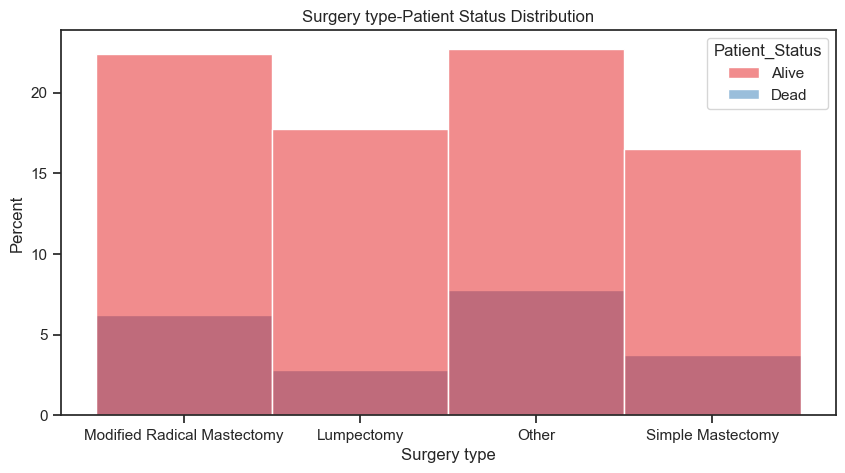

In [67]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x="Surgery_type",
             hue="Patient_Status",
             palette="Set1",
            stat="percent")

plt.title("Surgery type-Patient Status Distribution")
plt.xlabel("Surgery type")

### <font color="blue"> Feature Engineering

In [50]:
df.head()

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified Radical Mastectomy       15-Jan-17          19-Jun-17   
1                   Lumpectomy       26-Apr-17          09-Nov-18   
2                        Other       08-Sep-17          09-Jun-18   
3  Modified Radical Mastectomy       25-Jan-17          12-Jul-17   
4                        Other       06-May-17          27-Jun-19   

  Patient_Status  
0          Alive  
1           Dead  
2          Alive  
3          Alive  
4           Dead

In [51]:
df["Gender"]=df["Gender"].replace({"FEMALE":1,"MALE":0})

In [53]:
df["Tumour_Stage"]=df["Tumour_Stage"].replace({"I":1,"II":2,"III":3})

In [54]:
df["ER status"]=df["ER status"].replace({"Positive":1,"Negative":0})

In [55]:
df["PR status"]=df["PR status"].replace({"Positive":1,"Negative":0})

In [56]:
df["HER2 status"]=df["HER2 status"].replace({"Positive":1,"Negative":0})

In [58]:
df["Histology"].unique()

array(['Infiltrating Ductal Carcinoma', 'Mucinous Carcinoma',
       'Infiltrating Lobular Carcinoma'], dtype=object)

In [61]:
df["Histology"]=df["Histology"].replace({"Infiltrating Lobular Carcinoma":3,
                                         'Infiltrating Ductal Carcinoma':2,
                                        'Mucinous Carcinoma':1})

In [63]:
df["Surgery_type"].unique()

array(['Modified Radical Mastectomy', 'Lumpectomy', 'Other',
       'Simple Mastectomy'], dtype=object)

In [70]:
df["Surgery_type"]=df["Surgery_type"].replace({"Other":4,
                                               'Modified Radical Mastectomy':3,
                                               'Simple Mastectomy':2,
                                              'Lumpectomy':1})

In [71]:
df["Patient_Status"]=df["Patient_Status"].replace({"Alive":1,"Dead":0})

In [72]:
df.head()

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0       1  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0       1 -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0       1  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0       1  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0       1  0.221550   1.90680   0.52045 -0.311990   

   Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
0             3          2          1          1            0             3   
1             2          1          1          1            0             1   
2             3          2          1          1            0             4   
3             2          2          1          1            0             3   
4             2          2          1          1            0             4   

  Date_of_Surgery Date_of_Last_Visit  Patient_Status  
0       15-Jan-17          19-Jun-17             1.0  
1       26-Apr-17          09-Nov-18             0.0  
2       08-Sep-17          09-Jun-18             1.0  
3       25-Jan-17          12-Jul-17             1.0  
4       06-May-17          27-Jun-19             0.0

In [74]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [75]:
nan_df=df[df["Patient_Status"].isna()]

In [76]:
nan_df

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
7    TCGA-A7-A426  50.0       1  0.672490   1.27900 -0.321070  -0.11239   
22   TCGA-AN-A0FY  55.0       1  0.330640   0.84757 -0.494660   0.11656   
99   TCGA-A8-A06O  60.0       1  0.532420   1.54110 -1.009500  -0.12588   
111  TCGA-MS-A51U  44.0       1 -0.278840   2.16880 -0.462330   0.27220   
182  TCGA-C8-A1HI  40.0       1 -1.455300  -0.74177  1.133600  -0.83970   
196  TCGA-C8-A12U  46.0       1 -0.010999   0.86749  0.281570  -0.54588   
206  TCGA-E9-A1NH  71.0       1  0.394090   1.70540  0.035642   1.44100   
219  TCGA-C8-A12X  62.0       1  0.649340   1.81680  0.279260   0.13228   
221  TCGA-C8-A12O  50.0       1 -0.322890   0.98848 -0.293130  -0.26170   
285  TCGA-AC-A5EI  88.0       1 -2.340900   0.37246  0.208450  -1.64110   
286  TCGA-A8-A081  80.0       1  0.670770  -0.71039  0.186480   0.14664   
305  TCGA-BH-A18J  56.0       1 -0.675420   0.26937 -0.086603   1.07140   
321  TCGA-A8-A083  67.0       1  0.317420  -0.55585  0.356570   0.79733   

     Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
7               3          2          1          1            0             2   
22              1          3          1          1            0             3   
99              1          2          1          1            0             4   
111             2          2          1          1            0             3   
182             3          3          1          1            0             4   
196             2          3          1          1            0             4   
206             2          3          1          1            0             3   
219             2          3          1          1            0             4   
221             2          2          1          1            0             4   
285             1          2          1          1            0             2   
286             2          3          1          1            0             4   
305             3          2          1          1            0             3   
321             2          2          1          1            0             4   

    Date_of_Surgery Date_of_Last_Visit  Patient_Status  
7         16-May-17                NaN             NaN  
22        07-Nov-17                NaN             NaN  
99        11-Dec-17                NaN             NaN  
111       20-Jan-18                NaN             NaN  
182       07-Sep-18                NaN             NaN  
196       10-Jun-19                NaN             NaN  
206       26-Nov-18                NaN             NaN  
219       20-Jun-19                NaN             NaN  
221       16-Nov-18                NaN             NaN  
285       04-Jun-19                NaN             NaN  
286       14-Jun-19                NaN             NaN  
305       23-Aug-19                NaN             NaN  
321       02-Oct-19                NaN             NaN

In [77]:
df=df.dropna()

In [78]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

## <font color="purple"> Classification Model

In [79]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import f1_score

import xgboost as xgb

In [89]:
def algo_test(x,y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    d=DecisionTreeClassifier()
    gb=GradientBoostingClassifier()
    rgc= RandomForestClassifier()
    xgb1= xgb.XGBClassifier()

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)
    
    algos= [g,b,k,d,gb,rgc,xgb1]
    algo_names = ["GaussianNB","BernoulliNB","KNeighborsClassifier","DecisionTreeClassifier",
                 "GradientBoostingClassifier","RandomForestClassifier","Xgboost"]
                
    accuracy= []
    confusion = []
    fone=[]
    
    result = pd.DataFrame(columns=["Accuracy","Confusion","F1"],index = algo_names)
    
    for algo in algos:
        algo.fit(x_train,y_train)
        accuracy.append(accuracy_score(y_test,algo.predict(x_test)))
        confusion.append(confusion_matrix(y_test,algo.predict(x_test)))
        fone.append(f1_score(y_test, algo.predict(x_test)))
       
    
     
        
    result.Accuracy = accuracy
    result.Confusion = confusion
    result.F1 = fone
   
    
    return result.sort_values("Accuracy", ascending=False)

In [90]:
df["Patient_Status"]=df["Patient_Status"].astype(int)

In [91]:
df.head()

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0       1  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0       1 -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0       1  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0       1  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0       1  0.221550   1.90680   0.52045 -0.311990   

   Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
0             3          2          1          1            0             3   
1             2          1          1          1            0             1   
2             3          2          1          1            0             4   
3             2          2          1          1            0             3   
4             2          2          1          1            0             4   

  Date_of_Surgery Date_of_Last_Visit  Patient_Status  
0       15-Jan-17          19-Jun-17               1  
1       26-Apr-17          09-Nov-18               0  
2       08-Sep-17          09-Jun-18               1  
3       25-Jan-17          12-Jul-17               1  
4       06-May-17          27-Jun-19               0

In [92]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [95]:
x=df[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type']]
y=df['Patient_Status']

In [96]:
algo_test(x,y)

Accuracy           Confusion        F1
BernoulliNB                 0.828125  [[0, 11], [0, 53]]  0.905983
RandomForestClassifier      0.828125  [[0, 11], [0, 53]]  0.905983
GaussianNB                  0.812500  [[0, 11], [1, 52]]  0.896552
GradientBoostingClassifier  0.812500  [[1, 10], [2, 51]]  0.894737
Xgboost                     0.812500  [[1, 10], [2, 51]]  0.894737
KNeighborsClassifier        0.781250   [[2, 9], [5, 48]]  0.872727
DecisionTreeClassifier      0.718750  [[3, 8], [10, 43]]  0.826923

### prediction Patient_Status' NaN values

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [97]:
rfr=RandomForestClassifier()

In [99]:
model=rfr.fit(x_train,y_train)

In [104]:
nan_df

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
7    TCGA-A7-A426  50.0       1  0.672490   1.27900 -0.321070  -0.11239   
22   TCGA-AN-A0FY  55.0       1  0.330640   0.84757 -0.494660   0.11656   
99   TCGA-A8-A06O  60.0       1  0.532420   1.54110 -1.009500  -0.12588   
111  TCGA-MS-A51U  44.0       1 -0.278840   2.16880 -0.462330   0.27220   
182  TCGA-C8-A1HI  40.0       1 -1.455300  -0.74177  1.133600  -0.83970   
196  TCGA-C8-A12U  46.0       1 -0.010999   0.86749  0.281570  -0.54588   
206  TCGA-E9-A1NH  71.0       1  0.394090   1.70540  0.035642   1.44100   
219  TCGA-C8-A12X  62.0       1  0.649340   1.81680  0.279260   0.13228   
221  TCGA-C8-A12O  50.0       1 -0.322890   0.98848 -0.293130  -0.26170   
285  TCGA-AC-A5EI  88.0       1 -2.340900   0.37246  0.208450  -1.64110   
286  TCGA-A8-A081  80.0       1  0.670770  -0.71039  0.186480   0.14664   
305  TCGA-BH-A18J  56.0       1 -0.675420   0.26937 -0.086603   1.07140   
321  TCGA-A8-A083  67.0       1  0.317420  -0.55585  0.356570   0.79733   

     Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
7               3          2          1          1            0             2   
22              1          3          1          1            0             3   
99              1          2          1          1            0             4   
111             2          2          1          1            0             3   
182             3          3          1          1            0             4   
196             2          3          1          1            0             4   
206             2          3          1          1            0             3   
219             2          3          1          1            0             4   
221             2          2          1          1            0             4   
285             1          2          1          1            0             2   
286             2          3          1          1            0             4   
305             3          2          1          1            0             3   
321             2          2          1          1            0             4   

    Date_of_Surgery Date_of_Last_Visit  Patient_Status  
7         16-May-17                NaN             NaN  
22        07-Nov-17                NaN             NaN  
99        11-Dec-17                NaN             NaN  
111       20-Jan-18                NaN             NaN  
182       07-Sep-18                NaN             NaN  
196       10-Jun-19                NaN             NaN  
206       26-Nov-18                NaN             NaN  
219       20-Jun-19                NaN             NaN  
221       16-Nov-18                NaN             NaN  
285       04-Jun-19                NaN             NaN  
286       14-Jun-19                NaN             NaN  
305       23-Aug-19                NaN             NaN  
321       02-Oct-19                NaN             NaN

In [105]:
nan_pred = nan_df[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status','HER2 status', 'Surgery_type']]

In [106]:
nan_pred

Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
7    50.0       1  0.672490   1.27900 -0.321070  -0.11239             3   
22   55.0       1  0.330640   0.84757 -0.494660   0.11656             1   
99   60.0       1  0.532420   1.54110 -1.009500  -0.12588             1   
111  44.0       1 -0.278840   2.16880 -0.462330   0.27220             2   
182  40.0       1 -1.455300  -0.74177  1.133600  -0.83970             3   
196  46.0       1 -0.010999   0.86749  0.281570  -0.54588             2   
206  71.0       1  0.394090   1.70540  0.035642   1.44100             2   
219  62.0       1  0.649340   1.81680  0.279260   0.13228             2   
221  50.0       1 -0.322890   0.98848 -0.293130  -0.26170             2   
285  88.0       1 -2.340900   0.37246  0.208450  -1.64110             1   
286  80.0       1  0.670770  -0.71039  0.186480   0.14664             2   
305  56.0       1 -0.675420   0.26937 -0.086603   1.07140             3   
321  67.0       1  0.317420  -0.55585  0.356570   0.79733             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  
7            2          1          1            0             2  
22           3          1          1            0             3  
99           2          1          1            0             4  
111          2          1          1            0             3  
182          3          1          1            0             4  
196          3          1          1            0             4  
206          3          1          1            0             3  
219          3          1          1            0             4  
221          2          1          1            0             4  
285          2          1          1            0             2  
286          3          1          1            0             4  
305          2          1          1            0             3  
321          2          1          1            0             4

In [107]:
pred=model.predict(nan_pred)

In [108]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [109]:
nan_df["Patient_Status"]=pred

In [110]:
nan_df

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
7    TCGA-A7-A426  50.0       1  0.672490   1.27900 -0.321070  -0.11239   
22   TCGA-AN-A0FY  55.0       1  0.330640   0.84757 -0.494660   0.11656   
99   TCGA-A8-A06O  60.0       1  0.532420   1.54110 -1.009500  -0.12588   
111  TCGA-MS-A51U  44.0       1 -0.278840   2.16880 -0.462330   0.27220   
182  TCGA-C8-A1HI  40.0       1 -1.455300  -0.74177  1.133600  -0.83970   
196  TCGA-C8-A12U  46.0       1 -0.010999   0.86749  0.281570  -0.54588   
206  TCGA-E9-A1NH  71.0       1  0.394090   1.70540  0.035642   1.44100   
219  TCGA-C8-A12X  62.0       1  0.649340   1.81680  0.279260   0.13228   
221  TCGA-C8-A12O  50.0       1 -0.322890   0.98848 -0.293130  -0.26170   
285  TCGA-AC-A5EI  88.0       1 -2.340900   0.37246  0.208450  -1.64110   
286  TCGA-A8-A081  80.0       1  0.670770  -0.71039  0.186480   0.14664   
305  TCGA-BH-A18J  56.0       1 -0.675420   0.26937 -0.086603   1.07140   
321  TCGA-A8-A083  67.0       1  0.317420  -0.55585  0.356570   0.79733   

     Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
7               3          2          1          1            0             2   
22              1          3          1          1            0             3   
99              1          2          1          1            0             4   
111             2          2          1          1            0             3   
182             3          3          1          1            0             4   
196             2          3          1          1            0             4   
206             2          3          1          1            0             3   
219             2          3          1          1            0             4   
221             2          2          1          1            0             4   
285             1          2          1          1            0             2   
286             2          3          1          1            0             4   
305             3          2          1          1            0             3   
321             2          2          1          1            0             4   

    Date_of_Surgery Date_of_Last_Visit  Patient_Status  
7         16-May-17                NaN               1  
22        07-Nov-17                NaN               1  
99        11-Dec-17                NaN               1  
111       20-Jan-18                NaN               1  
182       07-Sep-18                NaN               1  
196       10-Jun-19                NaN               1  
206       26-Nov-18                NaN               1  
219       20-Jun-19                NaN               1  
221       16-Nov-18                NaN               1  
285       04-Jun-19                NaN               1  
286       14-Jun-19                NaN               1  
305       23-Aug-19                NaN               1  
321       02-Oct-19                NaN               1